In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/incidentes_viales .csv", sep = ";",  low_memory = False , encoding = 'utf_8',error_bad_lines=False)


In [ ]:
df.head()

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
0,2014,1105,Otro,CR 66 B CL 34,CR 066 B 034 000 00000,Tramo de via,A000095088,05/08/2014 07:15:00,2014-08-05T12:15:00.000Z,Con heridos,8,1451888,11,Los Conquistadores,Laureles Estadio,"[-75.589313202, 6.2397866157]",832677.92
1,2014,0509,Choque,CR 71 CL 103 D,CR 071 103 D 000 00000,Interseccion,A000095143,05/08/2014 14:30:00,2014-08-05T19:30:00.000Z,Con heridos,8,1451891,05,Girardot,Castilla,"[-75.5708179064, 6.3000411778]",834744.36
2,2014,1421,Choque,CR 49 CL 7,CR 049 007 000 00000,Tramo de via,A000095226,05/08/2014 15:50:00,2014-08-05T20:50:00.000Z,Con heridos,8,1451935,14,Patio Bonito,El Poblado,"[-75.5765743781, 6.20874755798]",834078.39
3,2014,0801,Otro,CR 39 A CL 66 C,CR 039 A 066 C 000 00000,Tramo de via,A000095227,05/08/2014 13:00:00,2014-08-05T18:00:00.000Z,Con heridos,8,1451956,08,Villa Hermosa,Villa Hermosa,"[-75.5512546684, 6.25905761463]",836897.02
4,2014,1017,Choque,CL 58 CR 37,CL 058 037 000 00000,Tramo de via,A000094940,05/08/2014 19:30:00,2014-08-06T00:30:00.000Z,Con heridos,8,1452022,10,Los Ángeles,La Candelaria,"[-75.5561495119, 6.24996631944]",836352.35


In [ ]:
df.columns

Index(['AÑO', 'CBML', 'CLASE_ACCIDENTE', 'DIRECCION', 'DIRECCION ENCASILLADA',
       'DISEÑO', 'EXPEDIENTE', 'FECHA_ACCIDENTE', 'FECHA_ACCIDENTES', 'MES',
       'NRO_RADICADO', 'NUMCOMUNA', 'BARRIO', 'COMUNA', 'LOCATION', 'X', 'Y'],
      dtype='object')

In [ ]:
df['GRAVEDAD']=df['MES']
df=df.drop(['MES'], axis=1)
df.head()

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y,GRAVEDAD
0,2014,1105,Otro,CR 66 B CL 34,CR 066 B 034 000 00000,Tramo de via,A000095088,05/08/2014 07:15:00,2014-08-05T12:15:00.000Z,8,1451888,11,Los Conquistadores,Laureles Estadio,"[-75.589313202, 6.2397866157]",832677.92,Con heridos
1,2014,0509,Choque,CR 71 CL 103 D,CR 071 103 D 000 00000,Interseccion,A000095143,05/08/2014 14:30:00,2014-08-05T19:30:00.000Z,8,1451891,05,Girardot,Castilla,"[-75.5708179064, 6.3000411778]",834744.36,Con heridos
2,2014,1421,Choque,CR 49 CL 7,CR 049 007 000 00000,Tramo de via,A000095226,05/08/2014 15:50:00,2014-08-05T20:50:00.000Z,8,1451935,14,Patio Bonito,El Poblado,"[-75.5765743781, 6.20874755798]",834078.39,Con heridos
3,2014,0801,Otro,CR 39 A CL 66 C,CR 039 A 066 C 000 00000,Tramo de via,A000095227,05/08/2014 13:00:00,2014-08-05T18:00:00.000Z,8,1451956,08,Villa Hermosa,Villa Hermosa,"[-75.5512546684, 6.25905761463]",836897.02,Con heridos
4,2014,1017,Choque,CL 58 CR 37,CL 058 037 000 00000,Tramo de via,A000094940,05/08/2014 19:30:00,2014-08-06T00:30:00.000Z,8,1452022,10,Los Ángeles,La Candelaria,"[-75.5561495119, 6.24996631944]",836352.35,Con heridos


In [ ]:
df

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y,GRAVEDAD
0,2014,1105,Otro,CR 66 B CL 34,CR 066 B 034 000 00000,Tramo de via,A000095088,05/08/2014 07:15:00,2014-08-05T12:15:00.000Z,8,1451888,11,Los Conquistadores,Laureles Estadio,"[-75.589313202, 6.2397866157]",832677.92,Con heridos
1,2014,0509,Choque,CR 71 CL 103 D,CR 071 103 D 000 00000,Interseccion,A000095143,05/08/2014 14:30:00,2014-08-05T19:30:00.000Z,8,1451891,05,Girardot,Castilla,"[-75.5708179064, 6.3000411778]",834744.36,Con heridos
2,2014,1421,Choque,CR 49 CL 7,CR 049 007 000 00000,Tramo de via,A000095226,05/08/2014 15:50:00,2014-08-05T20:50:00.000Z,8,1451935,14,Patio Bonito,El Poblado,"[-75.5765743781, 6.20874755798]",834078.39,Con heridos
3,2014,0801,Otro,CR 39 A CL 66 C,CR 039 A 066 C 000 00000,Tramo de via,A000095227,05/08/2014 13:00:00,2014-08-05T18:00:00.000Z,8,1451956,08,Villa Hermosa,Villa Hermosa,"[-75.5512546684, 6.25905761463]",836897.02,Con heridos
4,2014,1017,Choque,CL 58 CR 37,CL 058 037 000 00000,Tramo de via,A000094940,05/08/2014 19:30:00,2014-08-06T00:30:00.000Z,8,1452022,10,Los Ángeles,La Candelaria,"[-75.5561495119, 6.24996631944]",836352.35,Con heridos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270760,2020,1004,Caida Ocupante,CR 62 CL 59,CR 062 059 000 00000,Tramo de via,A001164101,31/08/2020 18:50:00,2020-08-31T23:50:00.000Z,8,1722059,10,El Chagualo,La Candelaria,"[-75.5731343044, 6.26063534822]",834475.51,Con heridos
270761,2020,1115,Otro,CL 50 CR 74,CL 050 074 000 00000,Tramo de via,A001164214,31/08/2020 18:50:00,2020-08-31T23:50:00.000Z,8,1722080,11,Cuarta Brigada,Laureles Estadio,"[-75.5902062951, 6.26040455473]",832585.61,Con heridos
270762,2020,515,Choque,CL 80 CR 65,CL 080 065 000 00000,Tramo de via,A001164472,31/08/2020 19:05:00,2020-09-01T00:05:00.000Z,8,1722288,5,Cementerio Universal,Castilla,"[-75.5735398111, 6.27625838886]",834435.55,Solo daños
270763,2020,207,Atropello,CL 104 CR 45,CL 104 045 000 00000,Tramo de via,A001164109,31/08/2020 19:30:00,2020-09-01T00:30:00.000Z,8,1722062,2,Villa del Socorro,Santa Cruz,"[-75.5515085985, 6.29359892373]",836879.66,Con heridos


In [ ]:
Lattitudes = pd.DataFrame(index=range(len(df)))
Lattitudes["latitudes"] = ""
Latitud_ind = pd.DataFrame(index=range(len(df)))
Latitud_ind["lon"] = ""
Latitud_ind["lat"] = ""
for i in range(0,len(df)):
    a=df['X'][i].find('[')
    b=df['X'][i].find(',')
    c=df['X'][i].find(']')

    e=float(df['X'][i][a+1:b])
    d=float(df['X'][i][b+1:c])
    Lattitudes.iloc[i]=[[e,d]]

    Latitud_ind.iloc[i]=[e,d]

In [ ]:
df['X']=Lattitudes['latitudes']

In [ ]:
df=df[['AÑO','CLASE_ACCIDENTE','LOCATION','GRAVEDAD','DISEÑO']]
df['lon']=Latitud_ind["lon"]
df['lat']=Latitud_ind["lat"] 
df_2014=df[df['AÑO']=='2014']
df_2014.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AÑO,CLASE_ACCIDENTE,LOCATION,GRAVEDAD,DISEÑO,lon,lat
0,2014,Otro,Laureles Estadio,Con heridos,Tramo de via,-75.5893,6.23979
1,2014,Choque,Castilla,Con heridos,Interseccion,-75.5708,6.30004
2,2014,Choque,El Poblado,Con heridos,Tramo de via,-75.5766,6.20875
3,2014,Otro,Villa Hermosa,Con heridos,Tramo de via,-75.5513,6.25906
4,2014,Choque,La Candelaria,Con heridos,Tramo de via,-75.5561,6.24997


In [ ]:
df['LOCATION'].unique()
df['LOCATION']= df['LOCATION'].apply(lambda x : 'No Georef' if x == '0' else x)
df['LOCATION']= df['LOCATION'].apply(lambda x : 'No Georef' if x == 'Sin Inf' else x)
df['LOCATION']= df['LOCATION'].apply(lambda x : 'No Georef' if x == 'nan' else x)
df['LOCATION']= df['LOCATION'].apply(lambda x : 'Aranjuez' if x == 'AU' else x)
df['LOCATION']= df['LOCATION'].apply(lambda x : 'No Georef' if x == 'In' else x)
df['LOCATION']= df['LOCATION'].apply(lambda x : 'No Georef' if x == 'SN' else x)
df['LOCATION']= df['LOCATION'].apply(lambda x : 'Corregimiento de San Sebastián de Palmitas' if x == 'Corregimiento de San Sebasti\\xE1n de Palmitas' else x)
df['LOCATION']= df['LOCATION'].apply(lambda x : 'Corregimiento de San Cristóbal' if x == 'Corregimiento de San Crist\\xF3bal' else x)
df['LOCATION']= df['LOCATION'].apply(lambda x : 'Belén' if x == 'Bel\\xE9n' else x)
df['LOCATION']= df['LOCATION'].apply(lambda x : 'La América' if x == 'La Am\\xE9rica' else x)
df['LOCATION'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

array(['Laureles Estadio', 'Castilla', 'El Poblado', 'Villa Hermosa',
       'La Candelaria', 'Aranjuez', 'Manrique', 'San Javier', 'Belén',
       'Buenos Aires', 'Guayabal', 'Doce de Octubre', 'Robledo', nan,
       'Corregimiento de San Antonio de Prado', 'Popular', 'La América',
       'Corregimiento de Santa Elena', 'No Georef',
       'Corregimiento de San Cristóbal', 'Santa Cruz',
       'Corregimiento de Altavista',
       'Corregimiento de San Sebastián de Palmitas'], dtype=object)

In [ ]:
df['AÑO'].unique()
df['AÑO']= df['AÑO'].apply(lambda x : '2019' if x == '2019\\r' else x)
df['AÑO'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [ ]:
df_2014=df_2014.dropna()
df_2014.isna().sum()

AÑO                0
CLASE_ACCIDENTE    0
LOCATION           0
GRAVEDAD           0
DISEÑO             0
lon                0
lat                0
dtype: int64

In [ ]:
!pip install --upgrade geopandas

     |████████████████████████████████| 1.0 MB 7.0 MB/s 
     |████████████████████████████████| 15.4 MB 40.5 MB/s 
     |████████████████████████████████| 6.3 MB 58.7 MB/s 


In [ ]:
df['GRAVEDAD'].unique()
df['GRAVEDAD']= df['GRAVEDAD'].apply(lambda x : 'Solo daños' if x == 'Solo da\\xF1os' else x)
df['GRAVEDAD'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['Con heridos', 'Solo daños', 'Con muertos'], dtype=object)

In [ ]:
df['CLASE_ACCIDENTE'].unique()
df['CLASE_ACCIDENTE']= df['CLASE_ACCIDENTE'].apply(lambda x : 'Caida Ocupante' if x == 'Caída de Ocupante' else x)
df['CLASE_ACCIDENTE']= df['CLASE_ACCIDENTE'].apply(lambda x : 'Caida Ocupante' if x == 'Caída Ocupante' else x)
df['CLASE_ACCIDENTE']= df['CLASE_ACCIDENTE'].apply(lambda x : 'Caida Ocupante' if x == 'Caida de Ocupante' else x)
df['CLASE_ACCIDENTE']= df['CLASE_ACCIDENTE'].apply(lambda x : 'No registra' if x == float("nan") else x)
df['CLASE_ACCIDENTE'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

array(['Otro', 'Choque', 'Atropello', 'Caida Ocupante', 'Volcamiento',
       'Incendio', nan], dtype=object)

In [ ]:
df.describe()

,AÑO,CLASE_ACCIDENTE,LOCATION,GRAVEDAD,DISEÑO,lon,lat
count,270765,270759,257967,270765,269617,270765.000000,270765.000000
unique,7,6,22,3,13,26868.000000,26868.000000
top,2016,Choque,La Candelaria,Con heridos,Tramo de via,-75.703776,6.221415
freq,47103,180575,52190,150071,187319,19613.000000,19613.000000


In [ ]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(Latitud_ind.lon, Latitud_ind.lat)]
df_mapa = Latitud_ind.drop(['lon', 'lat'], axis=1)
df_mapa['LOCATION']=df['LOCATION']
gdf = GeoDataFrame(df_mapa, crs="EPSG:4326", geometry=geometry)

In [ ]:
gdf

,LOCATION,geometry
0,Laureles Estadio,POINT (-75.58931 6.23979)
1,Castilla,POINT (-75.57082 6.30004)
2,El Poblado,POINT (-75.57657 6.20875)
3,Villa Hermosa,POINT (-75.55125 6.25906)
4,La Candelaria,POINT (-75.55615 6.24997)
...,...,...
270760,La Candelaria,POINT (-75.57313 6.26064)
270761,Laureles Estadio,POINT (-75.59021 6.26040)
270762,Castilla,POINT (-75.57354 6.27626)
270763,Santa Cruz,POINT (-75.55151 6.29360)


In [ ]:
len(df['LOCATION'].unique())
colors=["k","b","c","r","g","m","yelow","pink","violet","brown","beige","gold","darkgreen","skyblue","darkblue","dimgray","lightgray","yelowgreen","navy","coral","dodgerblue","salmon","y","plum","purple"]
len(colors)

25

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import pyplot, transforms
df_mapaMedellin=gpd.read_file('/content/drive/MyDrive/TAE Trabajo 1/Limite_Comuna_Corregimiento.geojson')
conteo= df['LOCATION'].value_counts(normalize=True)

viridis = cm.get_cmap('viridis', 25)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Mapa de accidentalidad Medellin Temporadas de 2014-2019: La Candelaria con {:.0%} , Laureles Estadio {:.0%}, Castilla {:.0%}'.format(conteo['La Candelaria'],conteo['Laureles Estadio'],conteo['Castilla']))
base = pyplot.gca().transData
df_mapaMedellin.boundary.plot(ax=ax)
rot = transforms.Affine2D().rotate_deg(0)
gdf.plot(column='LOCATION',ax=ax,legend = True,cmap='nipy_spectral',transform= rot + base)

DriverError: ignored

In [ ]:
geometry = [Point(xy) for xy in zip(df_2014.lon, df_2014.lat)]
df_mapa = df_2014.drop(['lon', 'lat'], axis=1)
df_mapa['CLASE_ACCIDENTE']=df_2014['CLASE_ACCIDENTE']
gdf = GeoDataFrame(df_mapa, crs="EPSG:4326", geometry=geometry)

In [ ]:
import matplotlib.patches as mpatches

conteo = df_2014['CLASE_ACCIDENTE'].value_counts(normalize=True)
viridis = cm.get_cmap('viridis', 7)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Mapa de clases accidentalidad Medellin Temporada de 2014')
base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(0)

x1 = mpatches.Patch(color='blue',label='Atropello: '+str(conteo['Atropello']*100)+'%')
x2 = mpatches.Patch(color='green',label='Caida de ocuapante:'+str(conteo['Caída de Ocupante']*100)+'%')
x3 = mpatches.Patch(color='purple',label='Choque: '+str(conteo['Choque']*100)+'%')
x4 = mpatches.Patch(color='pink',label='Incendio: '+str(conteo['Incendio']*100)+'%')
x5 = mpatches.Patch(color='yellowgreen',label='Otro: '+str(conteo['Otro']*100)+'%')
x6 = mpatches.Patch(color='skyblue',label='Volcamiento: '+str(conteo['Volcamiento']*100)+'%')

ax.legend(handles=[x1,x2,x3,x4,x5,x6])
df_mapaMedellin.boundary.plot(ax=ax)
gdf.plot(column='CLASE_ACCIDENTE',ax=ax,transform= rot + base)

In [ ]:
conteo = df_2014['CLASE_ACCIDENTE'].value_counts(normalize=True)
print(conteo)

2015

In [ ]:
df_2015=df[df['AÑO']=='2015']
df_2015.head()


In [ ]:
df_2015=df_2015.dropna()
df_2015.isna().sum()

In [ ]:
conteo= df_2015['CLASE_ACCIDENTE'].value_counts(normalize=True)
print(conteo)

In [ ]:
geometry = [Point(xy) for xy in zip(df_2015.lon, df_2015.lat)]
df_mapa = df_2015.drop(['lon', 'lat'], axis=1)
df_mapa['CLASE_ACCIDENTE']=df_2015['CLASE_ACCIDENTE']
gdf = GeoDataFrame(df_mapa, crs="EPSG:4326", geometry=geometry)

In [ ]:
df_2015['CLASE_ACCIDENTE'].unique()

In [ ]:
import matplotlib.patches as mpatches
conteo= df_2015['CLASE_ACCIDENTE'].value_counts(normalize=True)
viridis = cm.get_cmap('viridis', 7)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Mapa de clases accidentalidad Medellin Temporada de 2015')
base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(0)

x1 = mpatches.Patch(color='blue',label='Atropello:'+str(conteo['Atropello']*100)+'%')
x2 = mpatches.Patch(color='green',label='Caida de ocuapante:'+str(conteo['Caida Ocupante']*100)+'%')
x3 = mpatches.Patch(color='purple',label='Choque: '+str(conteo['Choque']*100)+'%')
x4 = mpatches.Patch(color='pink',label='Incendio: '+str(conteo['Incendio']*100)+'%')
x5 = mpatches.Patch(color='yellowgreen',label='Otro: '+str(conteo['Otro']*100)+'%')
x6 = mpatches.Patch(color='skyblue',label='Volcamiento: '+str(conteo['Volcamiento']*100)+'%')

ax.legend(handles=[x1,x2,x3,x4,x5,x6])
df_mapaMedellin.boundary.plot(ax=ax)
gdf.plot(column='CLASE_ACCIDENTE',ax=ax,transform= rot + base)

2016

In [ ]:
df_2016=df[df['AÑO']=='2016']
df_2016.head()

In [ ]:
df_2016=df_2016.dropna()
df_2016.isna().sum()

In [ ]:
conteo= df_2016['CLASE_ACCIDENTE'].value_counts(normalize=True)
print(conteo)

In [ ]:
geometry = [Point(xy) for xy in zip(df_2016.lon, df_2016.lat)]
df_mapa = df_2016.drop(['lon', 'lat'], axis=1)
df_mapa['CLASE_ACCIDENTE']=df_2016['CLASE_ACCIDENTE']
gdf = GeoDataFrame(df_mapa, crs="EPSG:4326", geometry=geometry)

In [ ]:
df_2016['CLASE_ACCIDENTE'].unique()

In [ ]:
conteo= df_2016['CLASE_ACCIDENTE'].value_counts(normalize=True)
viridis = cm.get_cmap('viridis', 7)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Mapa de clases accidentalidad Medellin Temporada de 2016')
base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(0)

x1 = mpatches.Patch(color='blue',label='Atropello: '+str(conteo['Atropello']*100)+'%')
x2 = mpatches.Patch(color='green',label='Caida de ocuapante:'+str(conteo['Caida Ocupante']*100)+'%')
x3 = mpatches.Patch(color='purple',label='Choque: '+str(conteo['Choque']*100)+'%')
x4 = mpatches.Patch(color='pink',label='Incendio: '+str(conteo['Incendio']*100)+'%')
x5 = mpatches.Patch(color='yellowgreen',label='Otro: '+str(conteo['Otro']*100)+'%')
x6 = mpatches.Patch(color='skyblue',label='Volcamiento: '+str(conteo['Volcamiento']*100)+'%')

ax.legend(handles=[x1,x2,x3,x4,x5,x6])
df_mapaMedellin.boundary.plot(ax=ax)
gdf.plot(column='CLASE_ACCIDENTE',ax=ax,transform= rot + base)

2017

In [ ]:
df_2017=df[df['AÑO']=='2017']
df_2017.head()

In [ ]:
df_2017=df_2017.dropna()
df_2017.isna().sum()

In [ ]:
conteo= df_2017['CLASE_ACCIDENTE'].value_counts(normalize=True)
print(conteo)

In [ ]:
geometry = [Point(xy) for xy in zip(df_2017.lon, df_2017.lat)]
df_mapa = df_2017.drop(['lon', 'lat'], axis=1)
df_mapa['CLASE_ACCIDENTE']=df_2017['CLASE_ACCIDENTE']
gdf = GeoDataFrame(df_mapa, crs="EPSG:4326", geometry=geometry)

In [ ]:
df_2017['CLASE_ACCIDENTE'].unique()

In [ ]:
conteo= df_2017['CLASE_ACCIDENTE'].value_counts(normalize=True)
viridis = cm.get_cmap('viridis', 7)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Mapa de clases accidentalidad Medellin Temporada de 2017')
base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(0)

x1 = mpatches.Patch(color='blue',label='Atropello: '+str(conteo['Atropello']*100)+'%')
x2 = mpatches.Patch(color='green',label='Caida de ocuapante:'+str(conteo['Caida Ocupante']*100)+'%')
x3 = mpatches.Patch(color='purple',label='Choque: '+str(conteo['Choque']*100)+'%')
x4 = mpatches.Patch(color='pink',label='Incendio: '+str(conteo['Incendio']*100)+'%')
x5 = mpatches.Patch(color='yellowgreen',label='Otro: '+str(conteo['Otro']*100)+'%')
x6 = mpatches.Patch(color='skyblue',label='Volcamiento: '+str(conteo['Volcamiento']*100)+'%')

ax.legend(handles=[x1,x2,x3,x4,x5,x6])
df_mapaMedellin.boundary.plot(ax=ax)
gdf.plot(column='CLASE_ACCIDENTE',ax=ax,transform= rot + base)

2018

In [ ]:
df_2018=df[df['AÑO']=='2018']
df_2018.head()

In [ ]:
df_2018=df_2018.dropna()
df_2018.isna().sum()

In [ ]:
conteo= df_2018['CLASE_ACCIDENTE'].value_counts(normalize=True)
print(conteo)

In [ ]:
geometry = [Point(xy) for xy in zip(df_2018.lon, df_2018.lat)]
df_mapa = df_2018.drop(['lon', 'lat'], axis=1)
df_mapa['CLASE_ACCIDENTE']=df_2018['CLASE_ACCIDENTE']
gdf = GeoDataFrame(df_mapa, crs="EPSG:4326", geometry=geometry)

In [ ]:
df_2018['CLASE_ACCIDENTE'].unique()

In [ ]:
conteo= df_2018['CLASE_ACCIDENTE'].value_counts(normalize=True)
viridis = cm.get_cmap('viridis', 7)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Mapa de clases accidentalidad Medellin Temporada de 2018')
base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(0)

x1 = mpatches.Patch(color='blue',label='Atropello: '+str(conteo['Atropello']*100)+'%')
x2 = mpatches.Patch(color='green',label='Caida de ocuapante:'+str(conteo['Caida Ocupante']*100)+'%')
x3 = mpatches.Patch(color='purple',label='Choque: '+str(conteo['Choque']*100)+'%')
x4 = mpatches.Patch(color='pink',label='Incendio: '+str(conteo['Incendio']*100)+'%')
x5 = mpatches.Patch(color='yellowgreen',label='Otro: '+str(conteo['Otro']*100)+'%')
x6 = mpatches.Patch(color='skyblue',label='Volcamiento: '+str(conteo['Volcamiento']*100)+'%')

ax.legend(handles=[x1,x2,x3,x4,x5,x6])
df_mapaMedellin.boundary.plot(ax=ax)
gdf.plot(column='CLASE_ACCIDENTE',ax=ax,transform= rot + base)

2019

In [ ]:
df_2019=df[df['AÑO']=='2019']
df_2019.head()

In [ ]:
df_2019=df_2019.dropna()
df_2019.isna().sum()

In [ ]:
conteo= df_2019['CLASE_ACCIDENTE'].value_counts(normalize=True)
print(conteo)

In [ ]:
geometry = [Point(xy) for xy in zip(df_2019.lon, df_2019.lat)]
df_mapa = df_2019.drop(['lon', 'lat'], axis=1)
df_mapa['CLASE_ACCIDENTE']=df_2019['CLASE_ACCIDENTE']
gdf = GeoDataFrame(df_mapa, crs="EPSG:4326", geometry=geometry)

In [ ]:
df_2019['CLASE_ACCIDENTE'].unique()

In [ ]:
conteo= df_2019['CLASE_ACCIDENTE'].value_counts(normalize=True)
viridis = cm.get_cmap('viridis', 7)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Mapa de clases accidentalidad Medellin Temporada de 2019')
base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(0)

x1 = mpatches.Patch(color='blue',label='Atropello: '+str(conteo['Atropello']*100)+'%')
x2 = mpatches.Patch(color='green',label='Caida de ocuapante:'+str(conteo['Caida Ocupante']*100)+'%')
x3 = mpatches.Patch(color='purple',label='Choque: '+str(conteo['Choque']*100)+'%')
x4 = mpatches.Patch(color='pink',label='Incendio: '+str(conteo['Incendio']*100)+'%')
x5 = mpatches.Patch(color='yellowgreen',label='Otro: '+str(conteo['Otro']*100)+'%')
x6 = mpatches.Patch(color='skyblue',label='Volcamiento: '+str(conteo['Volcamiento']*100)+'%')

ax.legend(handles=[x1,x2,x3,x4,x5,x6])
df_mapaMedellin.boundary.plot(ax=ax)
gdf.plot(column='CLASE_ACCIDENTE',ax=ax,transform= rot + base)

In [ ]:
conteo= df['LOCATION'].value_counts(normalize=True)
conteo

In [ ]:
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df_mapa = df.drop(['lon', 'lat'], axis=1)
df_mapa['GRAVEDAD']=df['GRAVEDAD']
gdf = GeoDataFrame(df_mapa, crs="EPSG:4326", geometry=geometry)

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Mapa de clases accidentalidad Medellin Temporada de 2014 a 2019')
base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(0)

conteo= df['GRAVEDAD'].value_counts(normalize=True)
x1 = mpatches.Patch(color='black',label='Con heridos: '+str(round(conteo['Con heridos']*100,2))+'%')
x2 = mpatches.Patch(color='green',label='Solo daños:'+str(round(conteo['Solo daños']*100,2))+'%')
x3 = mpatches.Patch(color='gray',label='Con muertos: '+str(round(conteo['Con muertos']*100,2))+'%')

ax.legend(handles=[x1,x2,x3])
df_mapaMedellin.boundary.plot(ax=ax)
gdf.plot(column='GRAVEDAD',ax=ax,cmap='nipy_spectral',transform= rot + base)

In [ ]:
df['AÑO'].unique()
df['AÑO']= df['AÑO'].apply(lambda x : '2019' if x == 'S2019\r ' else x)
df['AÑO'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

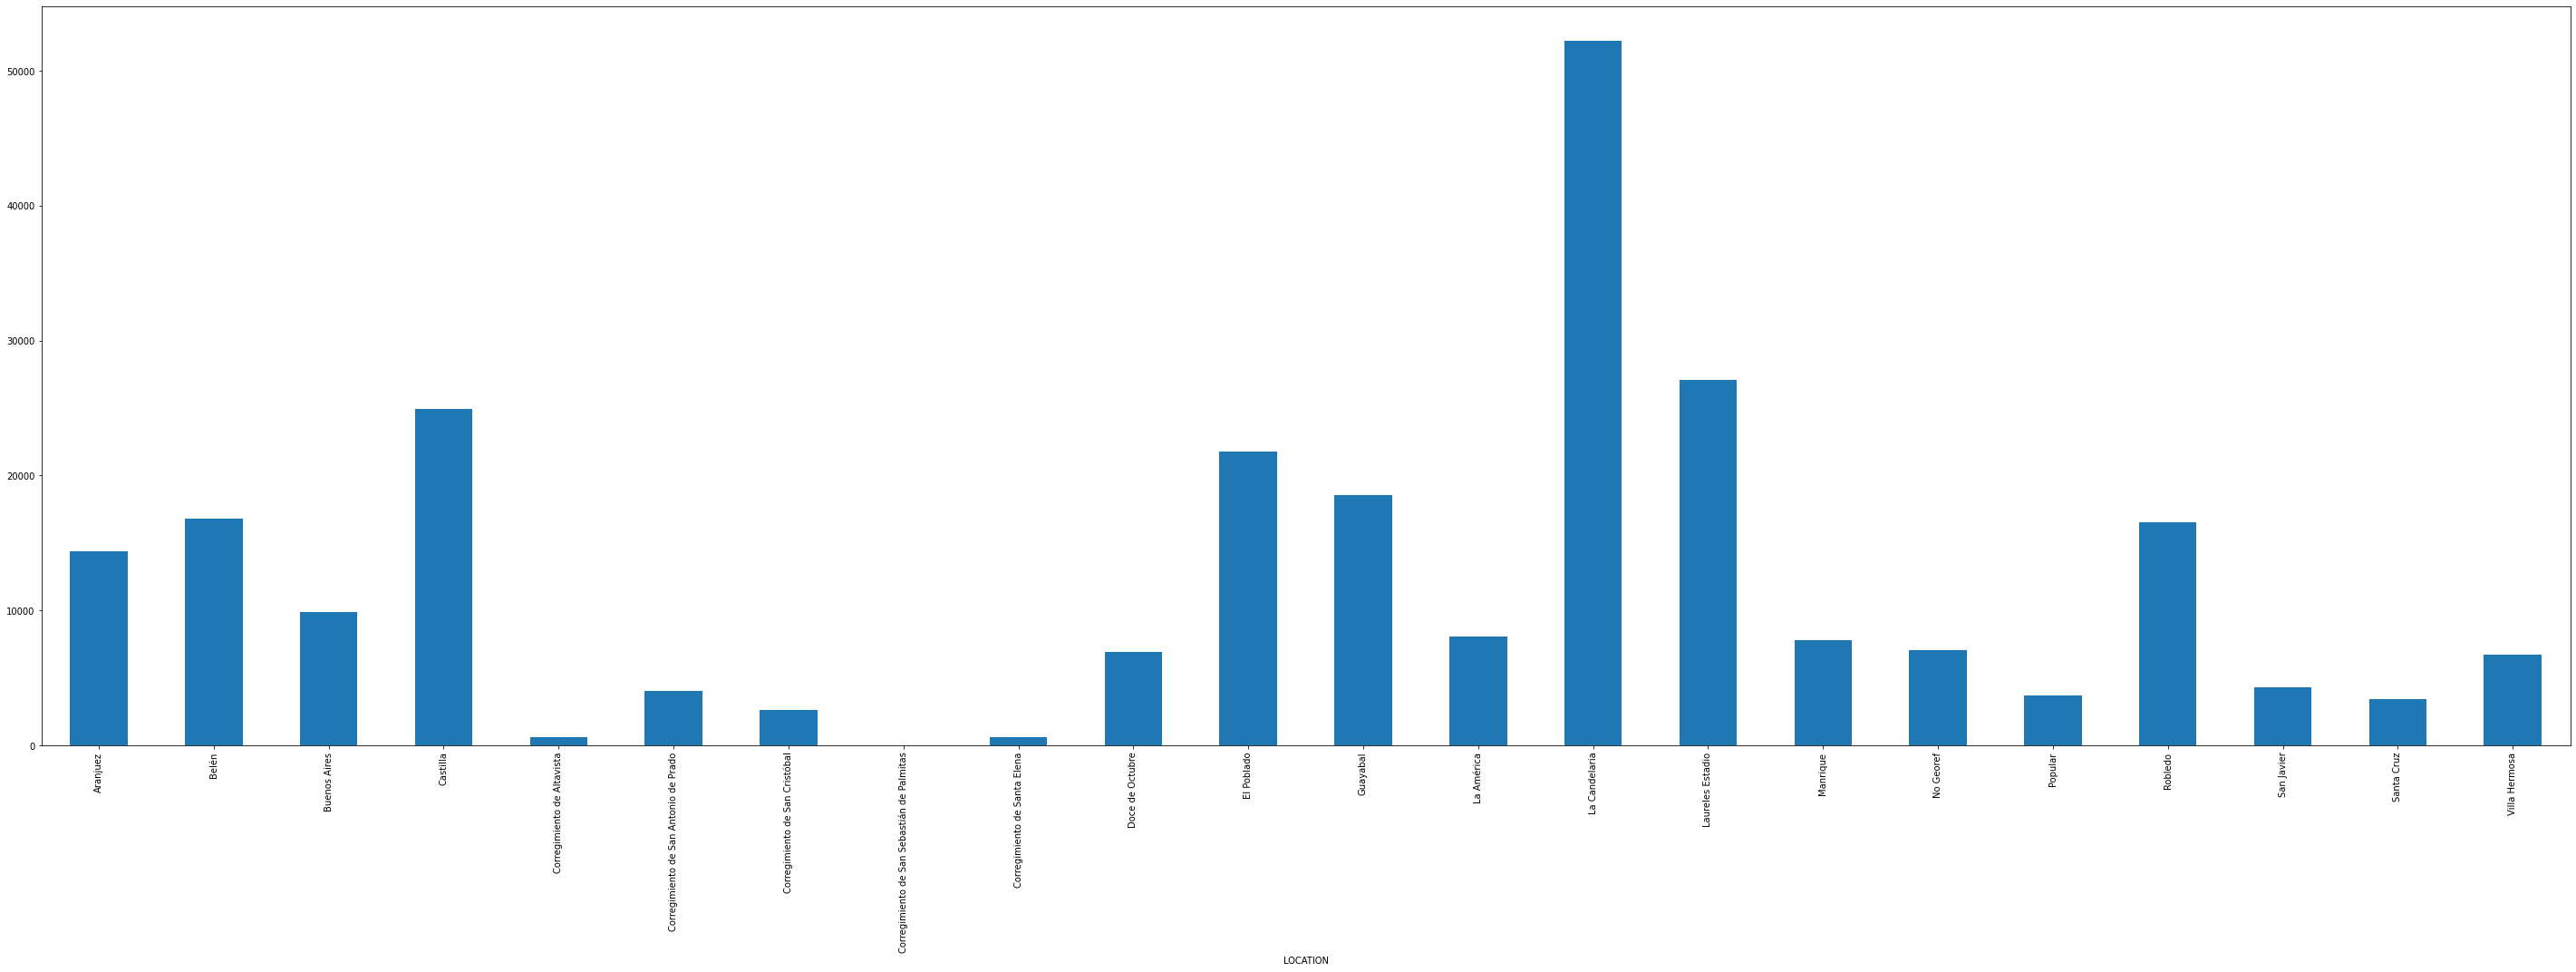

In [ ]:
fig, ax = plt.subplots(figsize=(50, 15))
gravedad_año=df.groupby(["LOCATION"])["GRAVEDAD"].count().plot(ax=ax,kind = "bar")

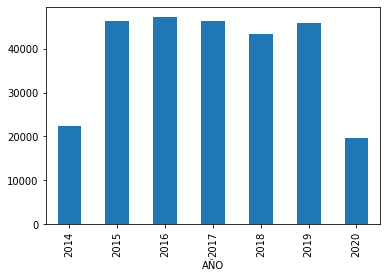

In [ ]:

gravedad_año=df.groupby(["AÑO"])["GRAVEDAD"].count().plot(kind = "bar",stacked=True)

In [ ]:
df['GRAVEDAD'].unique()


array(['Con heridos', 'Solo daños', 'Con muertos'], dtype=object)

In [ ]:
df['CLASE_ACCIDENTE'
].unique()

array(['Otro', 'Choque', 'Atropello', 'Caida Ocupante', 'Volcamiento',
       'Incendio', nan], dtype=object)

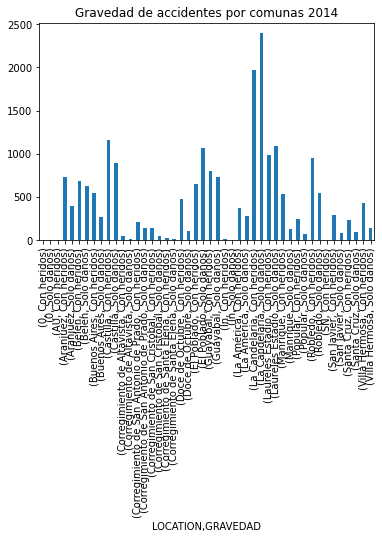

In [ ]:
df_2014_gravedad=df_2014[df_2014['GRAVEDAD']=='Con heridos']
df_2014_gravedad1=df_2014[df_2014['GRAVEDAD']=='Solo daños']
df_2014_gravedad2=df_2014[df_2014['GRAVEDAD']=='Con muertos']

df_2014.groupby(["LOCATION","GRAVEDAD"])["GRAVEDAD"].count().plot(kind = "bar",title='Gravedad de accidentes por comunas 2014')
#df_2014.groupby(["GRAVEDAD"])["LOCATION"].count().plot(kind = "bar",title='Gravedad de accidentes por comunas 2014')

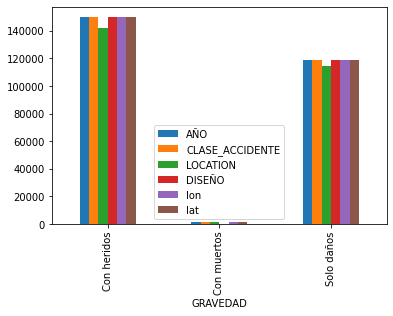

In [ ]:
df.groupby(["GRAVEDAD"]).count().plot(kind = "bar")

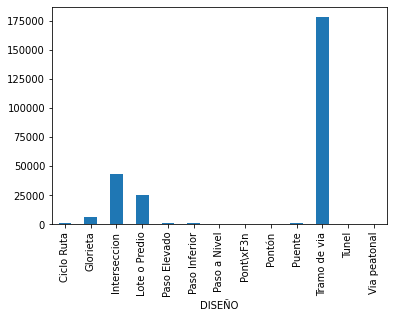

In [ ]:
df.groupby(["DISEÑO"])["LOCATION"].count().plot(kind = "bar")

AttributeError: ignored